# Bode plots for feedback control: sensitivity & complementary sensitivity 

Consider the sensitivity $S = \frac{1}{1+PC} $ and complementary sensitivity $T = \frac{PC}{1+PC}$. 
We can see that: $$S + T = \cfrac{1+PC}{1+PC} = 1$$

Consider implementing a PI controller for a second-order process where: 
$$ P = \cfrac{b}{s^2 + as + c}, \qquad C = k_p + k_i\cfrac{1}{s} $$

Start by defining parameters for our simulation 

In [1]:
from _447 import *

# process model parameters
a = 1.
b = 2.
c = 3. 

# proportional-itegral controller parameters
k_P = 5.
k_I = 5.

def TF(s):
    P = b / (s**2 + a*s + c)
    C = k_P + k_I/s
    S = 1 / (1 + P*C)
    T = (P*C) / (1 + P*C)
    return S, T

Let's look at the value of these transfer functions evaluated at some known complex frequency $j \omega$, (say $s=3j$).

In [2]:
S_1, T_1 = TF(1.j*3)
print('S(3j) =' , "{:g}".format(S_1))
print('T(3j) = ' , "{:g}".format(T_1))
print('S(3j) + T(3j) =' , "{:g}".format(S_1 + T_1))

S(3j) = -1.55172+0.62069j
T(3j) =  2.55172-0.62069j
S(3j) + T(3j) = 1+0j


Here we see that, as expected $S + T = 1$. 

But, recall that the Bode plot is plotting the *magnitude* of the transfer function, so let's evaluate their magnitudes: 

In [3]:
abs_S_1 = abs(S_1)
abs_T_1 = abs(T_1)
abs_ST_1 = abs(S_1+T_1)
print('|S(3j)| =' , "{:g}".format(abs_S_1))
print('|T(3j)| = ' , "{:g}".format(abs_T_1))
print('|S(3j) + T(3j)| = ' , "{:g}".format(abs_ST_1))
print('|S(3j)| + |T(3j)| =' , "{:g}".format(abs_S_1 + abs_T_1))

|S(3j)| = 1.67126
|T(3j)| =  2.62613
|S(3j) + T(3j)| =  1
|S(3j)| + |T(3j)| = 4.29739


And therein lies the problem! We have to add the transfer functions together before taking the magnitude for them to sum to 1. 

This is just a simple oversight in how we were talking about $S + T = 1$ and reasoning through the Bode plots. 

It is true that $S + T = 1$, it's just not true that $|S| + |T| = 1$. The traces we were examining on the Bode plots were already $|S|$ and $|T|$, so we would not expect that they sum to 1. 

Let's look at this in a Bode plot to confirm: 

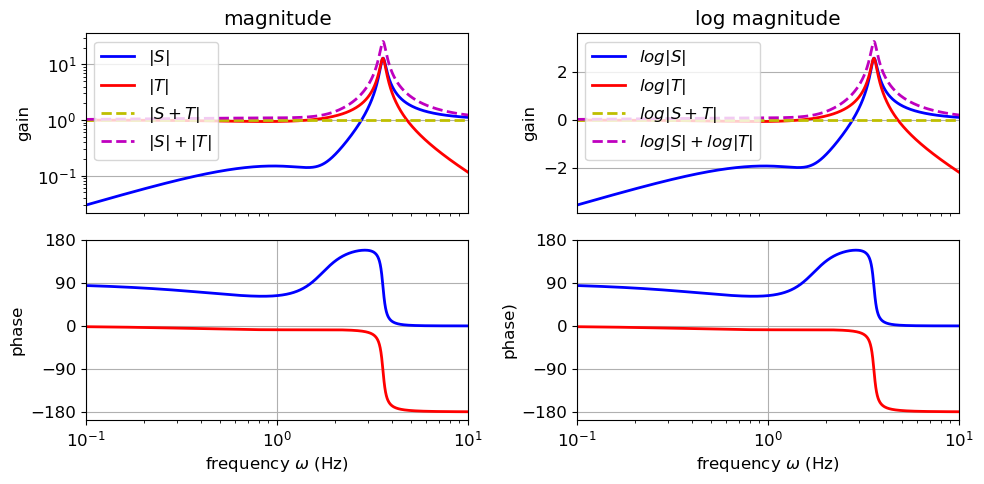

In [81]:
omega = np.logspace(-1,1,1000)
xlim = omega[[0,-1]]

S,T = TF(1.j*omega) # evaluate the transfer functions at a sweep of omegas

abs_S = np.abs(S) 
angle_S = np.unwrap(np.angle(S))*180./np.pi
abs_T = np.abs(T)
angle_T = np.unwrap(np.angle(T))*180./np.pi
abs_ST = np.abs(S+T)
angle_ST = np.unwrap(np.angle(G))*180./np.pi

fig = plt.figure(figsize=(10,5)); axs = []
ax = plt.subplot(2,2,1); ax.grid(True)
ax.loglog(omega,abs_S,'b-',lw=2,label='$|S|$')
ax.loglog(omega,abs_T,'r-',lw=2,label='$|T|$')
ax.loglog(omega,abs_ST,'y--',lw=2,label='$|S+T|$')
ax.loglog(omega,abs_S+abs_T,'m--',lw=2,label='$|S|+|T|$')
ax.set_ylabel(r'gain')
ax.set_title('magnitude')
# ax.set_yticks([10**-2,10**-1,10**0])
ax.set_xticks([])
ax.set_xlim(xlim)
axs.append(ax)
plt.legend()

ax = plt.subplot(2,2,3); ax.grid(True)
ax.semilogx(omega,angle_S,'b-',lw=2)
ax.semilogx(omega,angle_T,'r-',lw=2)
ax.set_xlabel(r'frequency $\omega$ (Hz)')
ax.set_ylabel(r'phase')
ax.set_yticks([180, 90, 0,-90,-180])
ax.set_xlim(xlim)
axs.append(ax)

ax = plt.subplot(2,2,2); ax.grid(True)
ax.semilogx(omega,np.log(abs_S),'b-',lw=2,label='$log|S|$')
ax.semilogx(omega,np.log(abs_T),'r-',lw=2,label='$log|T|$')
ax.semilogx(omega,np.log(abs_ST),'y--',lw=2,label='$log|S+T|$')
ax.semilogx(omega,np.log(abs_S+abs_T),'m--',lw=2,label='$log|S| + log|T|$')
ax.set_ylabel(r'gain')
ax.set_title('log magnitude')
# ax.set_yticks([-2,-1,0,1])
ax.set_xticks([])
ax.set_xlim(xlim)
plt.legend()
axs.append(ax)

ax = plt.subplot(2,2,4); ax.grid(True)
ax.semilogx(omega,angle_S,'b-',lw=2)
ax.semilogx(omega,angle_T,'r-',lw=2)
ax.set_xlabel(r'frequency $\omega$ (Hz)')
ax.set_ylabel(r'phase)')
ax.set_yticks([180, 90, 0,-90,-180])
ax.set_xlim(xlim)
axs.append(ax)

fig.tight_layout()

In conclusion, from these plots we see that we can achieve the same result whether we are looking at the gain in terms of magnitude (e.g. $|S|$, left plot) or log magnitude (e.g. $log|S|$, right plot). So, we can confidently say that $S+T = 1$. 